In [946]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.linear_model import LinearRegression, LogisticRegression


In [947]:
pd.set_option('display.max_rows', 5000)
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
df_merged = pd.concat([train_df, test_df], axis=0)
train_df.isnull().sum()
train_df.count()
# train_df = df_merged.iloc[0:891]
# test_df = df_merged.iloc[891::]
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**Missing values**

In [948]:
total = list(df_merged.count())
missing = list(df_merged.isnull().sum())
proportion = [str(round(missing[x]/(total[x]+missing[x])*100, 3))+"%" for x in range(len(total))]
missing_df = pd.DataFrame(proportion, df_merged.columns, columns=['percentage'])
missing_df['Missing'] = missing
missing_df['not missing'] = total
missing_df

,percentage,Missing,not missing
PassengerId,0.0%,0,1309
Survived,31.933%,418,891
Pclass,0.0%,0,1309
Name,0.0%,0,1309
Sex,0.0%,0,1309
Age,20.092%,263,1046
SibSp,0.0%,0,1309
Parch,0.0%,0,1309
Ticket,0.0%,0,1309
Fare,0.076%,1,1308


From this we can see that we should remove the cabin characteristic

In [949]:
df_merged = df_merged.drop('Cabin', axis=1)
df_merged.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


The other area with missing values is Age

/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/3651877611.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_merged['Age'], kde= True)


<AxesSubplot: ylabel='Density'>

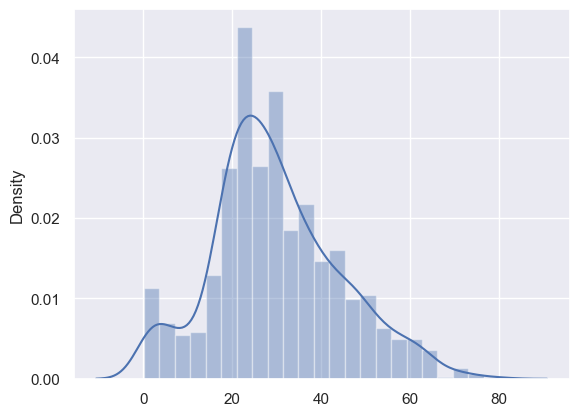

In [950]:
sns.distplot(x = df_merged['Age'], kde= True)

We could use the mean for the missing values in order to use the distribution.

In [951]:
import itertools
ListOlist = [df_merged['Pclass'].unique(), df_merged['Sex'].unique()]
sequence = pd.DataFrame(columns=['Pclass', 'Sex', 'Mean', 'median', '% of age missing'])
for l in itertools.product(*ListOlist):
    a = df_merged[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1])]['Age'].mean()
    b = df_merged[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1])]['Age'].median()
    c = str(round((df_merged[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1])]['Age'].isna().sum()/df_merged[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1])]['Age'].count())*100, 1))+'%'
    sequence.loc[len(sequence),:] = [*list(l), a,b,c]

sequence

,Pclass,Sex,Mean,median,% of age missing
0,3,male,25.962264,25.0,41.3%
1,3,female,22.185329,22.0,42.1%
2,1,male,41.029272,42.0,18.5%
3,1,female,37.037594,36.0,8.3%
4,2,male,30.81538,29.5,8.2%
5,2,female,27.499223,28.0,2.9%


In [952]:
for l in itertools.product(*ListOlist):
    df_merged.loc[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1]) & (df_merged['Age'].isnull()), 'Age'] = df_merged.loc[(df_merged['Pclass'] == l[0]) & (df_merged['Sex'] == l[1])]['Age'].median()

In [953]:
df_merged[df_merged['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN


<AxesSubplot: xlabel='Embarked', ylabel='count'>

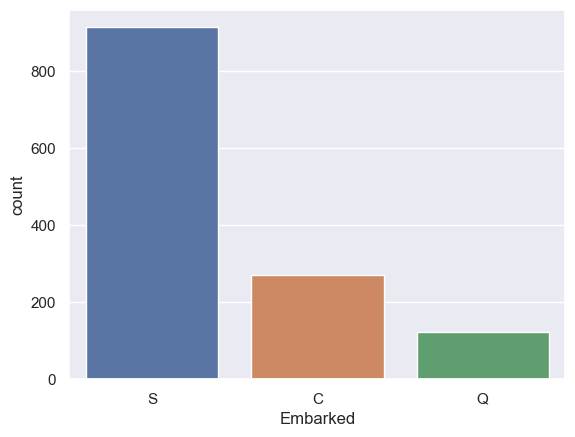

In [954]:
sns.countplot(x = 'Embarked', data= df_merged)

The most common type place where people embarked was S, so we will asign the S value onto the two missing people.

In [955]:
df_merged.set_index('PassengerId', inplace=True)
missing_embarked = df_merged[df_merged['Embarked'].isna()].index
df_merged.drop(missing_embarked, inplace=True)

In [956]:
df_merged.isna().sum()

Survived    418
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          1
Embarked      0
dtype: int64

In [957]:
df_merged[df_merged['Fare'].isna()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
PassengerId,,,,,,,,,,
1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,S


/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/1054162696.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x = df_merged['Fare'])


<AxesSubplot: ylabel='Density'>

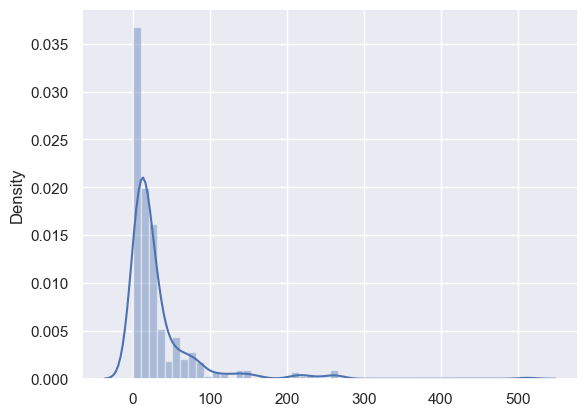

In [958]:
sns.distplot(x = df_merged['Fare'])

The distribution is not normal so we will fill the far value with the mode value.

In [959]:
df_merged['Fare'].fillna(df_merged['Fare'].median(), inplace=True)


Now there are no more missing values in the dataset, Yay!!

In [960]:
df_merged.isna().sum().sum()

418

**Univariate analysis**

Univariate analysis:
-  'Pclass'
-  'Name'
-  'Sex'
 - 'Age'
 - 'SibSp'
 - 'Parch'
 - 'Ticket'
 - 'Fare'

**Pclass** is the proxy for socio-economic status:
1st = Upper
2nd = Middle
3rd = Lowe

<AxesSubplot: xlabel='Pclass', ylabel='count'>

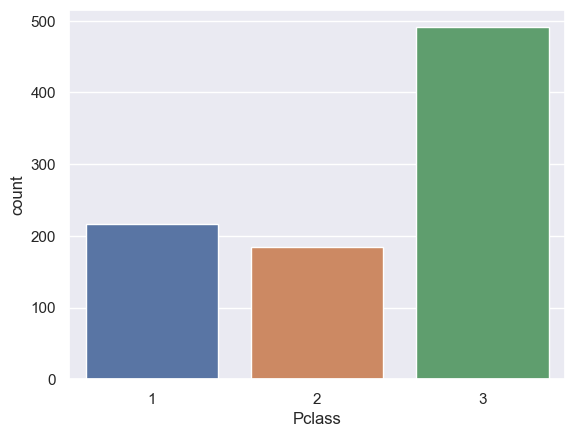

In [961]:
sns.countplot(x= 'Pclass', data= train_df)

<AxesSubplot: xlabel='Pclass', ylabel='Survived'>

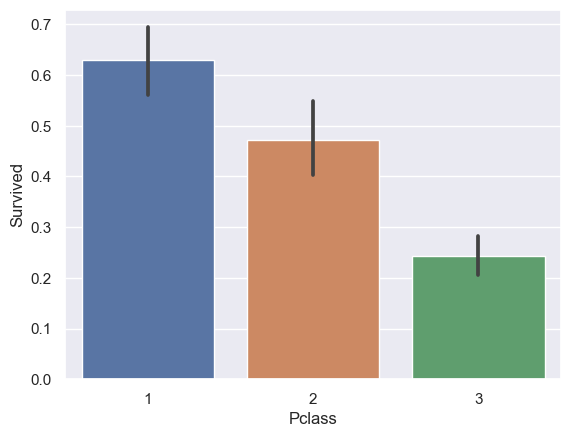

In [962]:
sns.barplot(x='Pclass', y = 'Survived', data=train_df)

The first class people were safest

**Name**

Made a new columns seperating the women that are married which is a sign of class.

In [963]:
df_merged['Initials'] = df_merged['Name'].apply(lambda x: x.split(', ')[1].split('. ')[0])

In [964]:
df_merged['Initials'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer', 'Dona'], dtype=object)

The women who are married seem to have a higher survival rate which makes sense because being married is  sign of a higher status

**Sex**


In [965]:
df_merged['Sex'] = df_merged['Sex'].map({'male':1 ,'female':0})
df_merged.head(10)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initials
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr
6,0.0,3,"Moran, Mr. James",1,25.0,0,0,330877,8.4583,Q,Mr
7,0.0,1,"McCarthy, Mr. Timothy J",1,54.0,0,0,17463,51.8625,S,Mr
8,0.0,3,"Palsson, Master. Gosta Leonard",1,2.0,3,1,349909,21.0750,S,Master
9,1.0,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,27.0,0,2,347742,11.1333,S,Mrs


<AxesSubplot: xlabel='Sex', ylabel='Survived'>

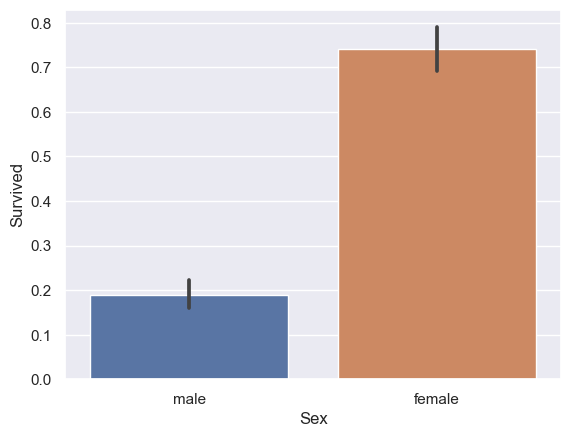

In [966]:
sns.barplot(x= 'Sex', y='Survived', data=train_df)

The survival rate of females was significantly higher than males.

**Age**

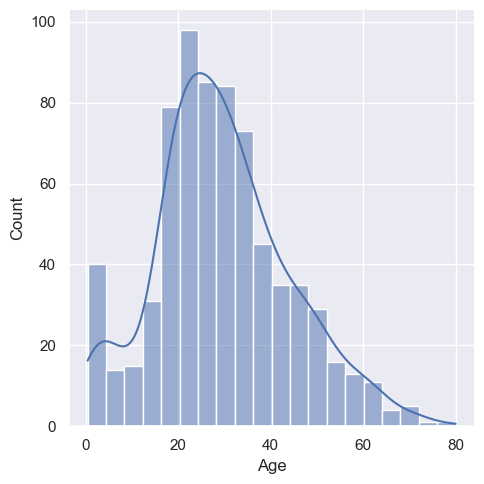

In [967]:
sns.displot(x= train_df['Age'], kde = True)

Clearly the most common age was between 20 and 40.

As you can see for men, those below the age of 20 had a significanlty higher survival rate.

For women, the survival rate was quite consistent accross ages, except for females between the ages of 10 and 20.

as shown below there is only one passenger over 80 so there is not enough data to detetmine any pattern 

Sibsp

This the the number of siblings or spouses that they have on board with them on the titanic.

The general trend seems to be that the more family members that passengers had on board, the lower the survival rate.

**Parch**

Parch is the number of parents or children aboard the titanic

<AxesSubplot: xlabel='Parch', ylabel='Survived'>

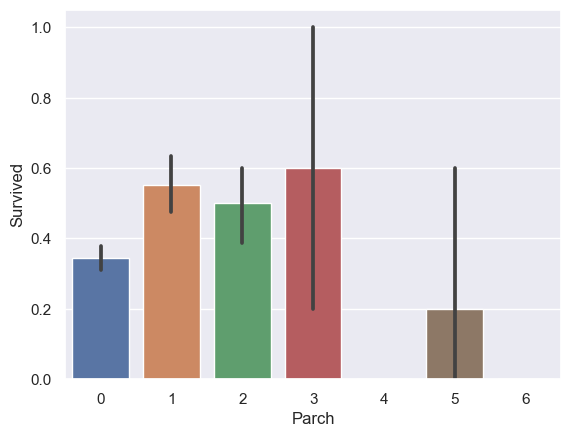

In [968]:
sns.barplot(x = 'Parch', y = 'Survived', data=train_df)

<AxesSubplot: xlabel='Parch', ylabel='count'>

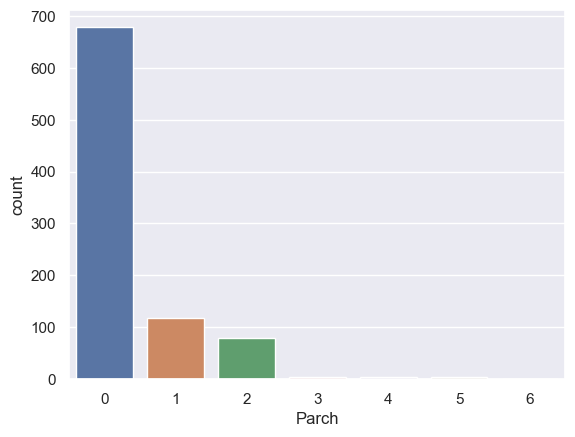

In [969]:
sns.countplot(x = 'Parch', data=train_df)

Seems to be very difficult to identify any patterns, we will group that categories Sibsp and Parch and just count the number of family members.

In [970]:
df_merged['IsAlone'] = df_merged['Parch'] + df_merged['SibSp']
df_merged['IsAlone'].apply(lambda x: 1 if x>0 else 0)
df_merged.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Initials,IsAlone
PassengerId,,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,S,Mr,1
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,Mrs,1
3,1.0,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,S,Mrs,1
5,0.0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,S,Mr,0


clearly those with more the 3 family member have a significantly lower survival rate which makes sense.

**Ticket**

The ticket does not have a correlation with survival so we will drop it from the model

**Fare**

you could maybe assumed that the more someone has payed for the ticket, the higher their class so we will look at the correlation

In [971]:
df_merged.drop(['SibSp', 'Parch', 'Name', 'Ticket'], axis = 1, inplace= True)
df_merged.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Initials,IsAlone
PassengerId,,,,,,,,
1,0.0,3,1,22.0,7.2500,S,Mr,1
2,1.0,1,0,38.0,71.2833,C,Mrs,1
3,1.0,3,0,26.0,7.9250,S,Miss,0
4,1.0,1,0,35.0,53.1000,S,Mrs,1
5,0.0,3,1,35.0,8.0500,S,Mr,0


there does seem to be a correlation between the amount paid for the fare and the likelihood of survival so we will use this for our model

**Embarked**

<AxesSubplot: xlabel='Embarked', ylabel='Survived'>

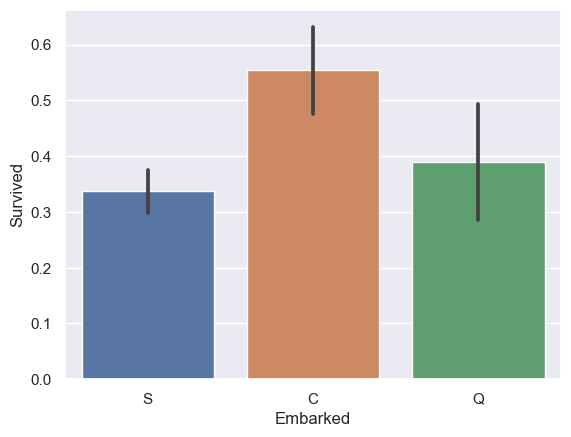

In [972]:
sns.barplot(x = 'Embarked', y='Survived', data = train_df)

**Univariate analysis**

Apart from the columns added, there does not seem to be multicollinearity so we do not need to remove any values in the model

**Model building**

In [973]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [974]:
df_merged = pd.concat([df_merged, pd.get_dummies(df_merged['Embarked'], prefix = 'Embarked')], axis= 1)
df_merged = pd.concat([df_merged, pd.get_dummies(df_merged['Initials'], prefix = 'Initials')], axis= 1)
df_merged = pd.concat([df_merged, pd.get_dummies(df_merged['Pclass'], prefix = 'Pclass')], axis= 1)
df_merged.head()
df_merged.drop(['Initials', 'Embarked', 'Pclass'], axis = 1, inplace= True)
df_merged.head()

,Survived,Sex,Age,Fare,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Initials_Capt,Initials_Col,...,Initials_Mme,Initials_Mr,Initials_Mrs,Initials_Ms,Initials_Rev,Initials_Sir,Initials_the Countess,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,0.0,1,22.0,7.2500,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1
2,1.0,0,38.0,71.2833,1,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1.0,0,26.0,7.9250,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1.0,0,35.0,53.1000,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
5,0.0,1,35.0,8.0500,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,1


In [975]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
df_merged.insert(loc = 0, column='x0', value=[1]*len(df_merged))
df_merged.head()


,x0,Survived,Sex,Age,Fare,IsAlone,Embarked_C,Embarked_Q,Embarked_S,Initials_Capt,...,Initials_Mme,Initials_Mr,Initials_Mrs,Initials_Ms,Initials_Rev,Initials_Sir,Initials_the Countess,Pclass_1,Pclass_2,Pclass_3
PassengerId,,,,,,,,,,,,,,,,,,,,,
1,1,0.0,1,22.0,7.2500,1,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1,1.0,0,38.0,71.2833,1,1,0,0,0,...,0,0,1,0,0,0,0,1,0,0
3,1,1.0,0,26.0,7.9250,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,1.0,0,35.0,53.1000,1,0,0,1,0,...,0,0,1,0,0,0,0,1,0,0
5,1,0.0,1,35.0,8.0500,0,0,0,1,0,...,0,1,0,0,0,0,0,0,0,1


In [994]:
train_df['Survived'] = [int(x) for x in train_df['Survived']]


/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/2314410154.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_df['Survived'] = [int(x) for x in train_df['Survived']]


PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
31     0
32     1
33     1
34     0
35     0
36     0
37     1
38     0
39     0
40     1
41     0
42     0
43     0
44     1
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     1
60     0
61     0
63     0
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     1
80     1
81     0
82     1
83     1
84     0
85     1
86     1
87     0
88     0
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    1
109    0
110    1
111    

In [992]:
train_df = df_merged.iloc[0:889]
test_df = df_merged.iloc[889::]

In [995]:
from sklearn.model_selection import train_test_split
x =train_df[[col for col in list(train_df.columns) if col != 'Survived']]
y = train_df['Survived']
x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:])

/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/1163641336.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:])
/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/1163641336.py:4: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x.iloc[:,1:] = sc_x.fit_transform(x.iloc[:,1:])


PassengerId
1      0
2      1
3      1
4      1
5      0
6      0
7      0
8      0
9      1
10     1
11     1
12     1
13     0
14     0
15     0
16     1
17     0
18     1
19     0
20     1
21     0
22     1
23     1
24     1
25     0
26     1
27     0
28     0
29     1
30     0
31     0
32     1
33     1
34     0
35     0
36     0
37     1
38     0
39     0
40     1
41     0
42     0
43     0
44     1
45     1
46     0
47     0
48     1
49     0
50     0
51     0
52     0
53     1
54     1
55     0
56     1
57     1
58     0
59     1
60     0
61     0
63     0
64     0
65     0
66     1
67     1
68     0
69     1
70     0
71     0
72     0
73     0
74     0
75     1
76     0
77     0
78     0
79     1
80     1
81     0
82     1
83     1
84     0
85     1
86     1
87     0
88     0
89     1
90     0
91     0
92     0
93     0
94     0
95     0
96     0
97     0
98     1
99     1
100    0
101    0
102    0
103    0
104    0
105    0
106    0
107    1
108    1
109    0
110    1
111    

In [997]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
lr.fit(x_train, y_train)

PassengerId
282    0
436    1
40     1
419    0
586    1
805    1
344    0
837    0
582    1
538    1
792    0
143    1
632    0
74     0
714    0
509    0
545    0
532    0
818    0
739    0
72     0
167    1
198    0
296    0
590    0
31     0
293    0
304    1
603    0
620    0
24     1
301    1
88     0
584    0
361    0
138    0
449    1
738    1
585    0
122    0
398    0
730    0
735    0
871    0
448    1
210    1
313    0
211    0
723    0
300    1
536    1
45     1
396    0
237    0
447    1
428    1
363    0
529    0
139    0
220    0
69     1
424    0
367    1
283    0
718    1
229    0
483    0
170    0
836    1
370    1
887    0
298    0
141    0
822    1
560    1
212    1
68     0
591    0
206    0
783    0
277    0
843    1
418    1
574    1
406    0
791    0
846    0
659    0
786    0
78     0
745    1
475    0
213    0
720    0
827    0
112    0
336    0
813    0
870    1
561    0
785    0
690    1
635    0
770    0
571    1
669    0
217    1
854    1
554    1
653    

In [999]:
pred = lr.predict(x_test)
pred


array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0])

In [981]:
from sklearn.metrics import confusion_matrix, accuracy_score
accuracy_score(pred, y_test)


0.826530612244898

In [982]:
confusion_matrix(pred, y_test)

array([[157,  24],
       [ 27,  86]])

**Actual results**

In [1000]:
x_real =test_df[[col for col in list(test_df.columns) if col != 'Survived']]
x_real.iloc[:,1:] = sc_x.fit_transform(x_real.iloc[:,1:])

/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/1259792837.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x_real.iloc[:,1:] = sc_x.fit_transform(x_real.iloc[:,1:])
/var/folders/_n/0wd0y54973jfy3blt337vjz00000gn/T/ipykernel_80587/1259792837.py:2: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  x_real.iloc[:,1:] = sc_x.fit_transform(x_real.iloc[:,1:])


In [1001]:
lr.fit(x, y)
lr.coef_

array([[-6.68409379e-04, -8.26545940e-01, -4.04721333e-01,
         1.64339727e-01, -7.34652936e-01,  7.99682592e-02,
         2.01062359e-02, -8.27239913e-02, -1.37899433e-01,
        -3.91531416e-03, -1.95710667e-01,  0.00000000e+00,
        -5.17964955e-02, -1.83979062e-01,  1.20682358e-01,
        -7.97134768e-03,  4.90474694e-01,  7.95758004e-02,
         1.27171867e-01,  8.91745539e-02, -4.75980481e-01,
         3.66047326e-01,  1.34344299e-01, -3.65111124e-01,
         1.67660553e-01,  1.03628352e-01,  5.27036410e-01,
         5.54488720e-02, -4.98300684e-01]])

In [1002]:
final = lr.predict(x_real)
final

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [1010]:
finally_ = pd.DataFrame(x_real.index, columns = ['PassengerId'])
finally_['Survived'] = final
finally_
finally_.to_csv('gender_submission.csv', index= False)

c